In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 6,8

In [4]:
data_train = pd.read_csv('../../data/train.csv')
data_test = pd.read_csv('../../data/test.csv')

In [5]:
data_train_copy = data_train.copy(deep=True)
id(data_train), id(data_train_copy)

(2217313388416, 2217222940880)

In [6]:
data_cleaner = [data_train_copy, data_test]

In [7]:
data_train_copy.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [8]:
print('Train columns with null values:\n', data_train_copy.isnull().sum())
print("-"*100)

print('Test/Validation columns with null values:\n', data_test.isnull().sum())
print("-"*100)

data_train.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------------------------------------------------------------------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
----------------------------------------------------------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Berriman, Mr. William John",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
data_train_copy.drop(['PassengerId','Cabin','Ticket'], axis=1, inplace = True)

In [10]:
print(data_train_copy.isnull().sum())
print("-"*100)
print(data_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------------------------------------------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [11]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']>1,'IsAlone'] = 1
    dataset['Prefix'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)

In [12]:
data_train_copy.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Prefix,FareBin,AgeBin
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,20.2500,S,3,1,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
207,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,18.7875,C,1,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
658,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,13.0000,S,1,0,Mr,"(7.91, 14.454]","(16.0, 32.0]"
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0000,S,1,0,Miss,"(31.0, 512.329]","(32.0, 48.0]"
600,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,27.0000,S,4,1,Mrs,"(14.454, 31.0]","(16.0, 32.0]"


In [13]:
data_train_copy[['FareBin','Survived']].groupby('FareBin',as_index=False).mean().sort_values('Survived',ascending=False)

,FareBin,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [14]:
data_train_copy[['AgeBin','Survived']].groupby('AgeBin',as_index=False).mean().sort_values('Survived',ascending=False)

,AgeBin,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.344762
4,"(64.0, 80.0]",0.090909


In [15]:
data_train_copy['Prefix'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
data_train_copy['Name'].groupby(data_train_copy['Prefix']).nunique().sort_values(ascending=False)

Prefix
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Don               1
the Countess      1
Lady              1
Sir               1
Mme               1
Ms                1
Capt              1
Name: Name, dtype: int64

In [17]:
data_test['Name'].groupby(data_test['Prefix']).nunique().sort_values(ascending=False)

Prefix
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [18]:
prefixes = (data_train_copy['Name'].groupby(data_train_copy['Prefix']).nunique() < 10)

In [19]:
prefixes

Prefix
Capt             True
Col              True
Don              True
Dr               True
Jonkheer         True
Lady             True
Major            True
Master          False
Miss            False
Mlle             True
Mme              True
Mr              False
Mrs             False
Ms               True
Rev              True
Sir              True
the Countess     True
Name: Name, dtype: bool

In [20]:
data_train_copy['Prefix'] = data_train_copy['Prefix'].apply(lambda a: 'Misc' if prefixes[a]==True else a)

In [21]:
data_train_copy.shape, data_test.shape

((891, 14), (418, 16))

In [22]:
combine = [data_train_copy,data_test]

In [23]:
le = LabelEncoder()
for dataset in combine:
    dataset['Sex_Code'] = le.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = le.fit_transform(dataset['Embarked'])
    dataset['Prefix_Code'] = le.fit_transform(dataset['Prefix'])
    dataset['AgeBin_Code'] = le.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = le.fit_transform(dataset['FareBin'])

In [24]:
data_train_copy.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Prefix,FareBin,AgeBin,Sex_Code,Embarked_Code,Prefix_Code,AgeBin_Code,FareBin_Code
208,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,7.750,Q,1,0,Miss,"(-0.001, 7.91]","(-0.08, 16.0]",0,1,2,0,0
546,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,26.000,S,2,1,Mrs,"(14.454, 31.0]","(16.0, 32.0]",0,2,4,1,2
353,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,17.800,S,2,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,2,3,1,2
583,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,40.125,C,1,0,Mr,"(31.0, 512.329]","(32.0, 48.0]",1,0,3,2,3
441,0,3,"Hampe, Mr. Leon",male,20.0,0,0,9.500,S,1,0,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,2,3,1,1


In [25]:
y = ['Survived']

In [26]:
#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Prefix','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Prefix_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  y + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Prefix_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = y + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data_train_copy[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = y + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Prefix', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Prefix_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Prefix_Master', 'Prefix_Misc', 'Prefix_Miss', 'Prefix_Mr', 'Prefix_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Prefix_Master,Prefix_Misc,Prefix_Miss,Prefix_Mr,Prefix_Mrs
0,3,1,0,22.0,7.2500,2,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,1,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,0,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,1,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,0,0,1,0,0,1,0,0,0,1,0


In [27]:
data_train_copy[data1_x_calc].sample(5)

,Sex_Code,Pclass,Embarked_Code,Prefix_Code,SibSp,Parch,Age,Fare
425,1,3,2,3,0,0,29.699118,7.2500
9,0,2,0,4,1,0,14.000000,30.0708
29,1,3,2,3,0,0,29.699118,7.8958
422,1,3,2,3,0,0,29.000000,7.8750
576,0,2,2,2,0,0,34.000000,13.0000


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train1_x, test1_x, train1_y, test1_y = train_test_split(data_train_copy[data1_x_calc],data_train_copy[y], random_state=0)
train1_bin_x, test1_bin_x, train1_bin_y, test1_bin_y = train_test_split(data_train_copy[data1_x_bin],data_train_copy[y], random_state=0)
train1_dummy_x, test1_dummy_x, train1_dummy_y, test1_dummy_y = train_test_split(data1_dummy[data1_x_dummy],data_train_copy[y],random_state=0)

print("Data1 Shape: {}".format(data_train_copy.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_bin_x.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Prefix_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


## CHECK CORRELATION

In [30]:
data_train_copy[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values('Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [31]:
data_train_copy[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values('Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
data_train_copy[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values('Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
data_train_copy[['Prefix','Survived']].groupby('Prefix',as_index=False).mean().sort_values('Survived',ascending=False)

,Prefix,Survived
4,Mrs,0.792000
2,Miss,0.697802
0,Master,0.575000
1,Misc,0.444444
3,Mr,0.156673


In [34]:
data_train_copy[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values('Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [35]:
data_train_copy[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values('Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [36]:
data_train_copy[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values('Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
data_train_copy[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean().sort_values('Survived',ascending=False)

,IsAlone,Survived
1,1,0.505650
0,0,0.303538


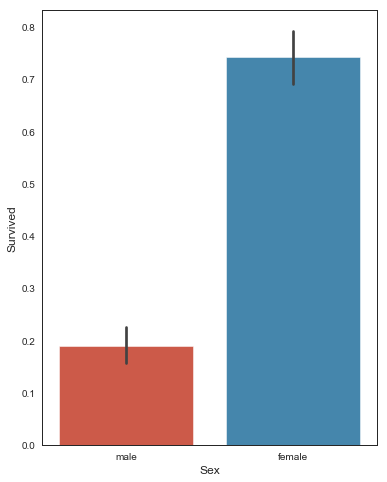

In [38]:
sns.barplot(x=data_train_copy['Sex'], y=data_train_copy['Survived']);

## MODEL DATA

In [42]:
import warnings
warnings.filterwarnings('ignore')
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits=10,
    test_size=.3,
    train_size=.6,
    random_state=0)


#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
#create table to compare MLA predictions
MLA_predict = data_train_copy[y]
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data_train_copy[data1_x_bin], data_train_copy[y], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data_train_copy[data1_x_bin], data_train_copy[y])
    MLA_predict[MLA_name] = alg.predict(data_train_copy[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0335609
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0265028
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.825,0.0683569,0.00826304
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.890449,0.824254,0.0756653,0.00995135
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0300898
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0450704
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.820149,0.0547936,0.00196609
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.89176,0.818284,0.0699157,0.0097543
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.814552,0.0699157,0.000514913
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00291958


In [43]:
cv_results = model_selection.cross_validate(XGBClassifier(), data_train_copy[data1_x_bin], data_train_copy[y], cv  = cv_split)

In [44]:
result = XGBClassifier().fit(data_train_copy[data1_x_bin], data_train_copy[y])

In [45]:
result = result.predict(data_test[data1_x_bin])

In [46]:
result.shape

(418,)

In [47]:
# функция для записи прогнозов в файл
def write_to_submission_file(predicted_labels, out_file,
                             target='Survived', index_label="PassengerId"):
    predicted_df = pd.DataFrame(list(predicted_labels.items()),
                      columns=['PassengerId','Survived'])
    predicted_df = predicted_df.set_index('PassengerId')
    predicted_df.to_csv(out_file)

In [48]:
predicted_labels = dict(zip(data_test['PassengerId'], result))

In [49]:
write_to_submission_file(predicted_labels,'../competitions/xgboost_1.csv')

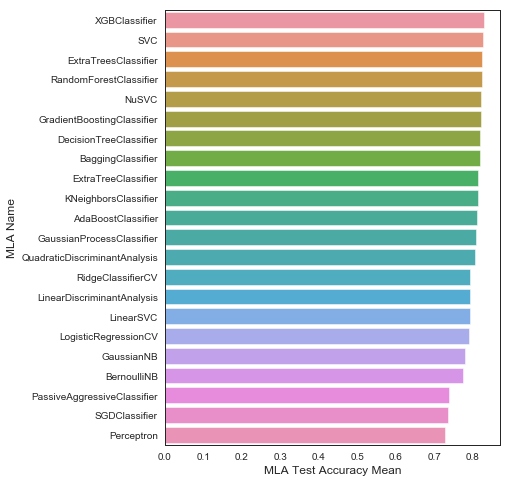

In [50]:
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare);

In [51]:
data_train_copy['Random_Predict'] = 0
data_train_copy['Random_Predict'] = data_train_copy['Random_Predict'].apply(lambda a: random.randint(0, 1))

In [52]:
data_train_copy.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Prefix,FareBin,AgeBin,Sex_Code,Embarked_Code,Prefix_Code,AgeBin_Code,FareBin_Code,Random_Predict
109,1,3,"Moran, Miss. Bertha",female,29.699118,1,0,24.1500,Q,2,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,1,2,1,2,1
218,1,1,"Bazzani, Miss. Albina",female,32.000000,0,0,76.2917,C,1,0,Miss,"(31.0, 512.329]","(16.0, 32.0]",0,0,2,1,3,1
548,0,3,"Goldsmith, Mr. Frank John",male,33.000000,1,1,20.5250,S,3,1,Mr,"(14.454, 31.0]","(32.0, 48.0]",1,2,3,2,2,0
219,0,2,"Harris, Mr. Walter",male,30.000000,0,0,10.5000,S,1,0,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,2,3,1,1,1
859,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,7.2292,C,1,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,0,3,1,0,1


In [53]:
#1 = Right Guess and 0 = Wrong Guess
data_train_copy['Random_Score'] = 0 
data_train_copy.loc[data_train_copy['Survived']==data_train_copy['Random_Predict'], 'Random_Score'] =1

In [54]:
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data_train_copy['Survived'], data_train_copy['Random_Predict'])*100))

Coin Flip Model Accuracy w/SciKit: 50.28%


In [55]:
data_train_copy[data_train_copy['Sex']=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()

Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000
                          (14.454, 31.0]

In [56]:
data_train_copy[data_train_copy['Sex']=='male'].groupby(['Sex','Prefix'])['Survived'].mean()

Sex   Prefix
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64

In [57]:
def handmade_tree(dataset):
    Model = pd.DataFrame(data = {'Predict':[]})
    for index, row in dataset.iterrows():
        Model.loc[index,'Predict'] = 0
        if (dataset.loc[index,'Sex'] == 'female'):
            Model.loc[index,'Predict'] = 1
        if ((dataset.loc[index,'Sex'] == 'female') & (dataset.loc[index,'Pclass'] == 3) & (dataset.loc[index,'Embarked'] == 'S') & (dataset.loc[index,'Fare'] > 8)):
            Model.loc[index,'Predict'] = 0
        if((dataset.loc[index,'Sex'] == 'male') & (dataset.loc[index,'Prefix'] == 'Master')):
            Model.loc[index,'Predict'] = 1
    return Model

In [58]:
Tree_Predict = handmade_tree(data_train_copy)

In [59]:
Tree_Predict.shape

(891, 1)

In [60]:
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data_train_copy['Survived'], Tree_Predict)*100))

Decision Tree Model Accuracy/Precision Score: 82.04%



In [61]:
print(metrics.classification_report(data_train_copy['Survived'], Tree_Predict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

   micro avg       0.82      0.82      0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



In [62]:
DT = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(DT, X=data_train_copy[data1_x_bin], y=data_train_copy[y],cv=cv_split)

In [63]:
DT.fit(data_train_copy[data1_x_bin],data_train_copy[y])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [64]:
print('BEFORE DT Parameters: ', DT.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57


In [65]:
#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

print(list(model_selection.ParameterGrid(param_grid)))

[{'criterion': 'gini', 'max_depth': 2, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 6, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 8, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}, {'criterion': 'gini', 'max_depth': None, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 2, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 8, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': None, 'random_state': 0}]


In [66]:
#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)

In [67]:
tune_model

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [68]:
%%time
tune_model.fit(data_train_copy[data1_x_bin], data_train_copy[y])

Wall time: 718 ms


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
tune_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'random_state': 0}

In [70]:
tune_model.best_score_

0.8739650038002728

In [71]:
#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00


In [72]:
rfe_cv = feature_selection.RFECV(DT,step=1,cv=cv_split, scoring='accuracy')

In [73]:
rfe_cv.fit(data_train_copy[data1_x_bin],data_train_copy[y])

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [74]:
rfe_columns = data_train_copy[data1_x_bin].columns.values[rfe_cv.get_support()]

In [75]:
rfe_columns

array(['Sex_Code', 'Pclass', 'Prefix_Code', 'FamilySize', 'AgeBin_Code',
       'FareBin_Code'], dtype=object)

In [76]:
rfe_results = model_selection.cross_validate(DT,X=data_train_copy[rfe_columns], y=data_train_copy[y],cv=cv_split)

In [77]:
#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data_train_copy[rfe_columns].shape) 
print('AFTER DT RFE Training Columns New: ', rfe_columns)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Prefix_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22


In [78]:
grid_search_cv = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),scoring='roc_auc',param_grid=param_grid,cv=cv_split)

In [79]:
grid_search_cv.fit(data_train_copy[rfe_columns], data_train_copy[y])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [80]:
print('AFTER DT RFE Tuned Parameters: ', grid_search_cv.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(grid_search_cv.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(grid_search_cv.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(grid_search_cv.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21


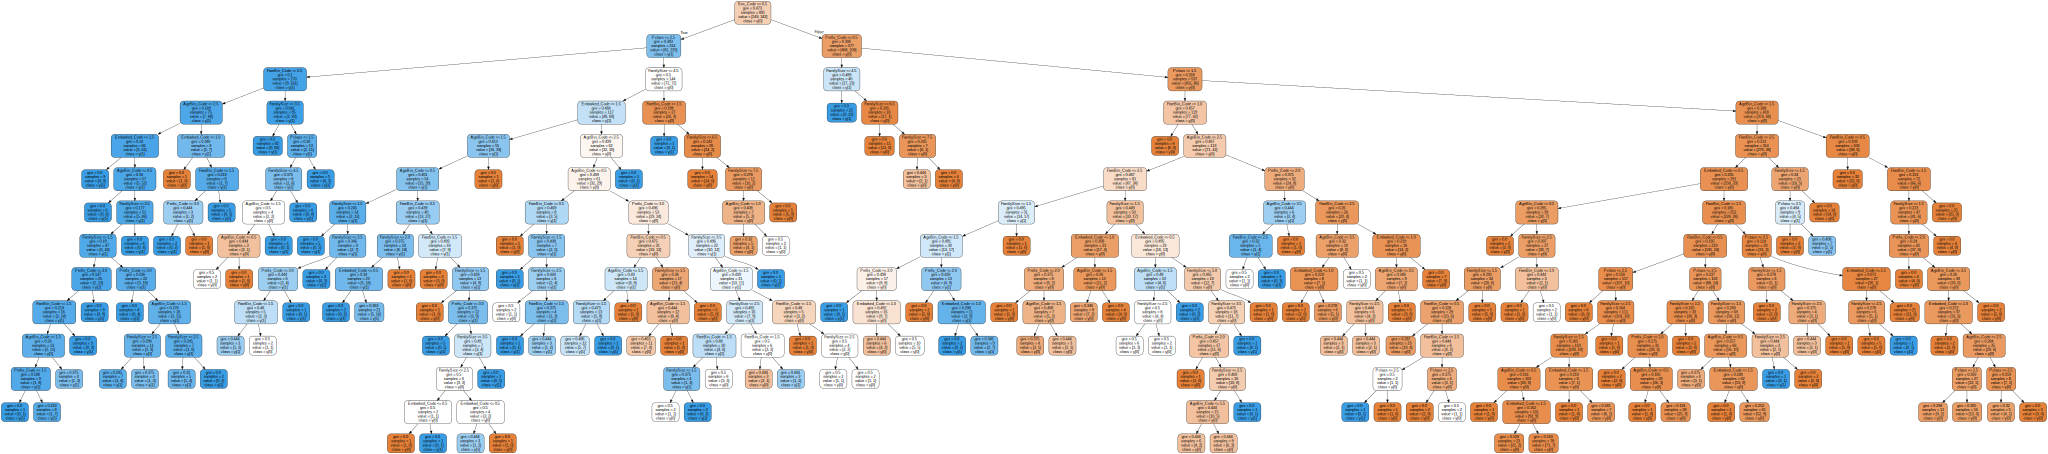

In [91]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

In [89]:
!dot -Tpng titanic_tree.dot -o dot_data.png

In [90]:
!ls -l *.png

-rw-r--r-- 1 Diana_Aimbetova Domain Users 2087093 Jul 25 10:49 dot_data.png


In [94]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

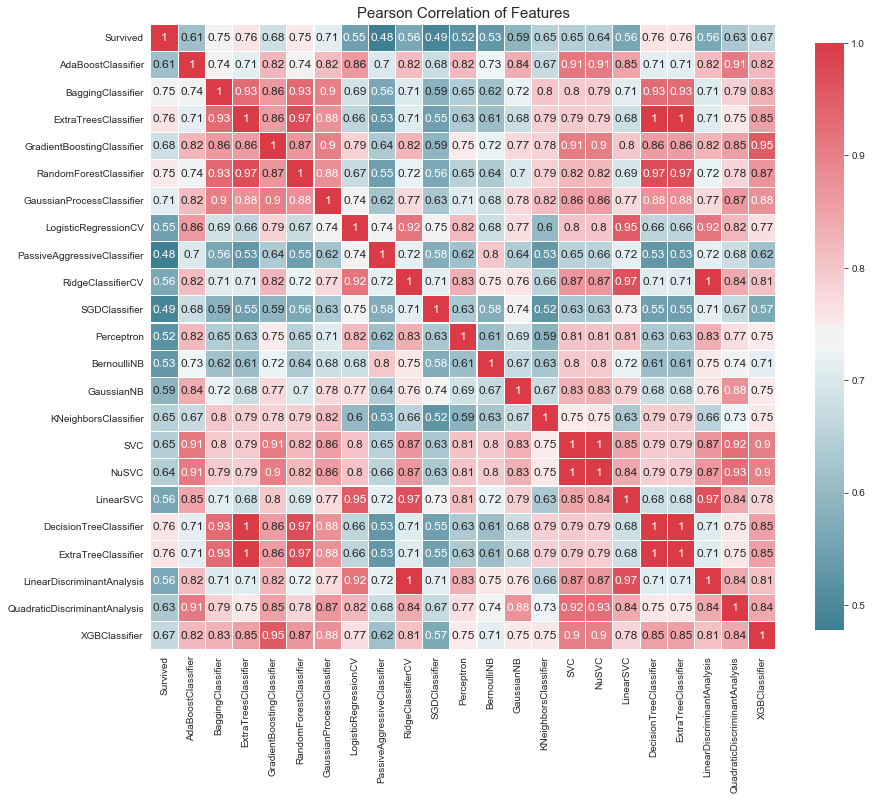

In [95]:
correlation_heatmap(MLA_predict)

In [ ]:
from sklearn.ensemble import VotingClassifier
vote_est = [
    'abc', ensemble.AdaBoostClassifier(),
    'bc', ensemble.BaggingClassifier(),
    'etc', ensemble.ExtraTreesClassifier(),
    'gbc', ensemble.GradientBoostingClassifier(),
    'rfc', ensemble.RandomForestClassifier(),
    
    'gpc', gaussian_process.GaussianProcessClassifier(),
    
    'logreg', linear_model.LogisticRegressionCV(),
    
    'gnb', naive_bayes.GaussianNB(),
    'bnb', naive_bayes.BernoulliNB(),
    
    
]

In [96]:
import numpy as np
a = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]
print(np.std(a,ddof=1))

3.1622776601683795
